### 数据更新

In [1]:
import akshare as ak

macro_china_cpi_df = ak.macro_china_cpi()
macro_china_cpi_df.to_csv("data/macro_china_cpi_df.csv", index=False, encoding="utf-8-sig")
macro_china_pmi_df = ak.macro_china_pmi()
macro_china_pmi_df.to_csv("data/macro_china_pmi_df.csv", index=False, encoding="utf-8-sig")
macro_china_society_electricity_df = ak.macro_china_society_electricity()
macro_china_society_electricity_df.to_csv("data/macro_china_society_electricity_df.csv", index=False, encoding="utf-8-sig")
macro_china_imports_yoy_df = ak.macro_china_imports_yoy()
macro_china_imports_yoy_df.to_csv("data/macro_china_imports_yoy_df.csv", index=False, encoding="utf-8-sig")
macro_china_money_supply_df = ak.macro_china_money_supply()
macro_china_money_supply_df.to_csv("data/macro_china_money_supply_df.csv", index=False, encoding="utf-8-sig")

### 数据分析

选取最重要的几个数据
- CPI：大家关注的少
- PMI：替代就业率
- 发电量：替代GDP
- 进口量：需求数据
- 国房景气指数：找一个房地产的数据
- M1M2 剪刀差：货币流向

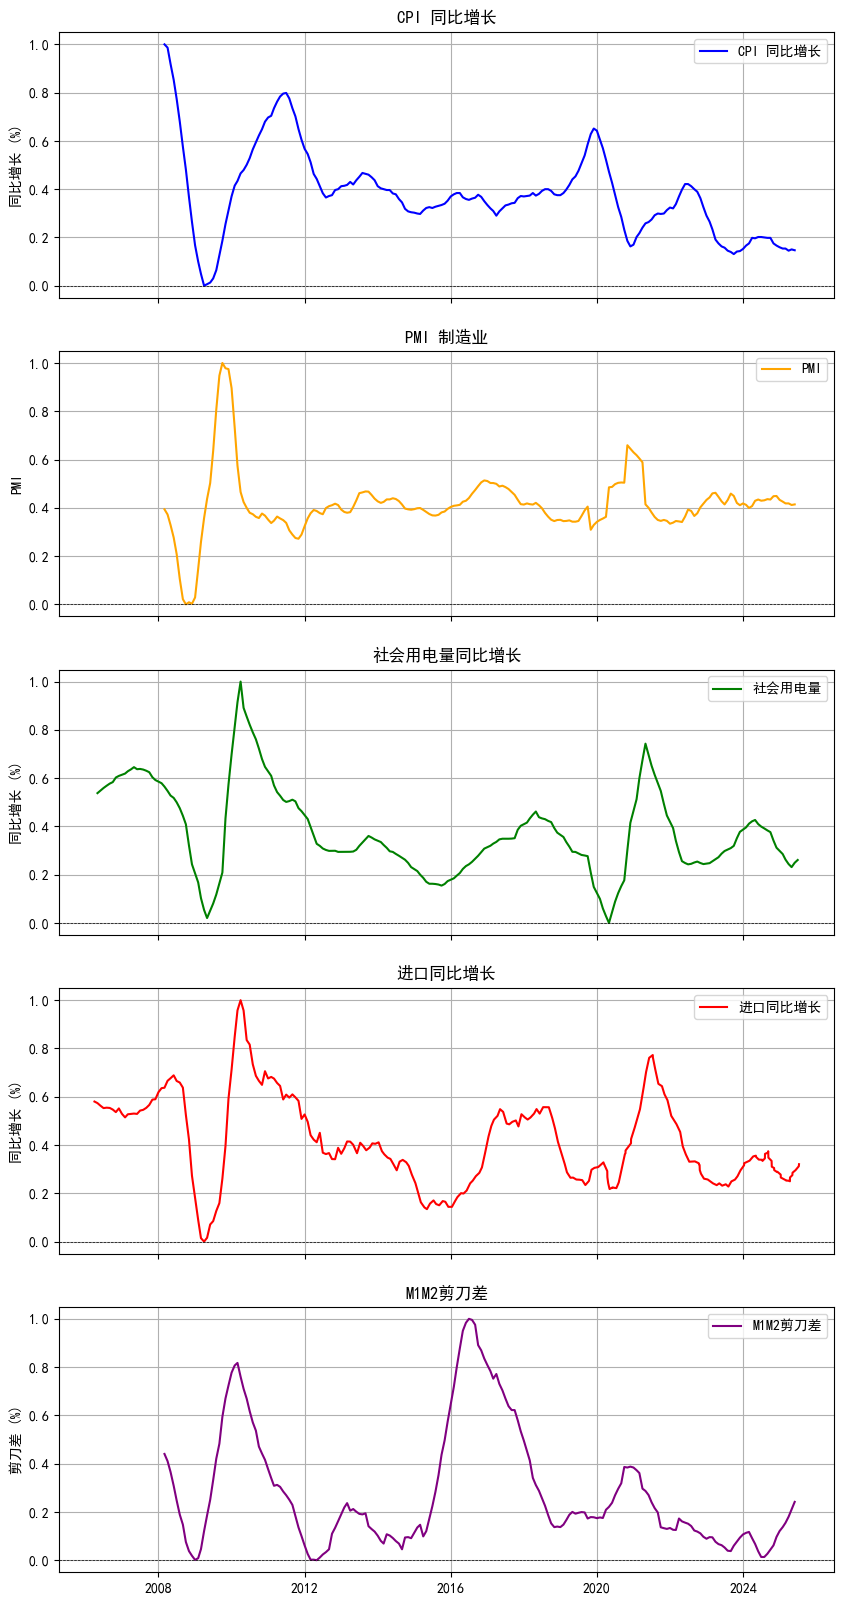

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

cpi = pd.read_csv("data/macro_china_cpi_df.csv", encoding="utf-8-sig")
cpi["月份"] = pd.to_datetime(cpi["月份"], format="%Y年%m月份")

pmi = pd.read_csv("data/macro_china_pmi_df.csv", encoding="utf-8-sig")
pmi["月份"] = pd.to_datetime(pmi["月份"], format="%Y年%m月份")

electricity = pd.read_csv("data/macro_china_society_electricity_df.csv", encoding="utf-8-sig", dtype={"统计时间": str})
electricity["统计时间"] = pd.to_datetime(electricity["统计时间"], format="%Y.%m")
electricity = electricity.sort_values(by="统计时间")

imports = pd.read_csv("data/macro_china_imports_yoy_df.csv", encoding="utf-8-sig")
imports["日期"] = pd.to_datetime(imports["日期"], format="%Y-%m-%d")

money = pd.read_csv("data/macro_china_money_supply_df.csv", encoding="utf-8-sig")
money["月份"] = pd.to_datetime(money["月份"], format="%Y年%m月份")
money["M1M2剪刀差"] = money["货币(M1)-同比增长"] - money["货币和准货币(M2)-同比增长"]


# 日期范围
date_start = "2006-01-01"
cpi = cpi[cpi["月份"] >= pd.to_datetime(date_start)]
pmi = pmi[pmi["月份"] >= pd.to_datetime(date_start)]
electricity = electricity[electricity["统计时间"] >= pd.to_datetime(date_start)]
imports = imports[imports["日期"] >= pd.to_datetime(date_start)]
money = money[money["月份"] >= pd.to_datetime(date_start)]

# 缺省处理
# cpi["全国-同比增长"] = cpi["全国-同比增长"].fillna(method="ffill")
# pmi["制造业-同比增长"] = pmi["制造业-同比增长"].fillna(method="ffill")
electricity["全社会用电量同比"] = electricity["全社会用电量同比"].fillna(method="ffill")
imports["今值"] = imports["今值"].fillna(method="ffill")
# money["M1M2剪刀差"] = money["M1M2剪刀差"].fillna(method="ffill")

# 平滑处理
smooth_window = 6
cpi["全国-同比增长"] = cpi["全国-同比增长"].rolling(window=smooth_window, center=True).mean()
pmi["制造业-同比增长"] = pmi["制造业-同比增长"].rolling(window=smooth_window, center=True).mean()
electricity["全社会用电量同比"] = electricity["全社会用电量同比"].rolling(window=smooth_window, center=True).mean()
imports["今值"] = imports["今值"].rolling(window=smooth_window, center=True).mean()
money["M1M2剪刀差"] = money["M1M2剪刀差"].rolling(window=smooth_window, center=True).mean()

# 归一化处理
cpi["全国-同比增长"] = (cpi["全国-同比增长"] - cpi["全国-同比增长"].min()) / (cpi["全国-同比增长"].max() - cpi["全国-同比增长"].min())
pmi["制造业-同比增长"] = (pmi["制造业-同比增长"] - pmi["制造业-同比增长"].min()) / (pmi["制造业-同比增长"].max() - pmi["制造业-同比增长"].min())
electricity["全社会用电量同比"] = (electricity["全社会用电量同比"] - electricity["全社会用电量同比"].min()) / (electricity["全社会用电量同比"].max() - electricity["全社会用电量同比"].min())
imports["今值"] = (imports["今值"] - imports["今值"].min()) / (imports["今值"].max() - imports["今值"].min())
money["M1M2剪刀差"] = (money["M1M2剪刀差"] - money["M1M2剪刀差"].min()) / (money["M1M2剪刀差"].max() - money["M1M2剪刀差"].min())


# 汉字支持
plt.rcParams["font.sans-serif"] = ["SimHei"]
plt.rcParams["axes.unicode_minus"] = False

# 把这几个图并列在一起，日期对齐
fig, axs = plt.subplots(5, 1, figsize=(10, 20), sharex=True)
axs[0].plot(cpi["月份"], cpi["全国-同比增长"], label="CPI 同比增长", color="blue")
axs[0].set_title("CPI 同比增长")
axs[0].set_ylabel("同比增长 (%)")
axs[0].legend()
axs[1].plot(pmi["月份"], pmi["制造业-同比增长"], label="PMI", color="orange")
axs[1].set_title("PMI 制造业")
axs[1].set_ylabel("PMI")
axs[1].legend()
axs[2].plot(electricity["统计时间"], electricity["全社会用电量同比"], label="社会用电量", color="green")
axs[2].set_title("社会用电量同比增长")
axs[2].set_ylabel("同比增长 (%)")
axs[2].legend()
axs[3].plot(imports["日期"], imports["今值"], label="进口同比增长", color="red")
axs[3].set_title("进口同比增长")
axs[3].set_ylabel("同比增长 (%)")
axs[3].legend()
axs[4].plot(money["月份"], money["M1M2剪刀差"], label="M1M2剪刀差", color="purple")
axs[4].set_title("M1M2剪刀差")
axs[4].set_ylabel("剪刀差 (%)")
axs[4].legend()

# 设置零轴
for ax in axs:
    ax.axhline(0, color='black', linewidth=0.5, linestyle='--')
    ax.grid(True)

plt.savefig("output/macro_china_analysis.png", dpi=300, bbox_inches='tight')

In [3]:
# 用 plotly 画在一张图上

import plotly.graph_objects as go
fig_plotly = go.Figure()
fig_plotly.add_trace(go.Scatter(x=cpi["月份"], y=cpi["全国-同比增长"], mode='lines', name='CPI 同比增长', line=dict(color='blue')))
fig_plotly.add_trace(go.Scatter(x=pmi["月份"], y=pmi["制造业-同比增长"], mode='lines', name='PMI 制造业', line=dict(color='orange')))
fig_plotly.add_trace(go.Scatter(x=electricity["统计时间"], y=electricity["全社会用电量同比"], mode='lines', name='社会用电量同比增长', line=dict(color='green')))
fig_plotly.add_trace(go.Scatter(x=imports["日期"], y=imports["今值"], mode='lines', name='进口同比增长', line=dict(color='red')))
fig_plotly.add_trace(go.Scatter(x=money["月份"], y=money["M1M2剪刀差"], mode='lines', name='M1M2剪刀差', line=dict(color='purple')))
fig_plotly.update_layout(title='中国宏观经济指标', xaxis_title='日期', yaxis_title='指标值', template='plotly_white')
fig_plotly.show()


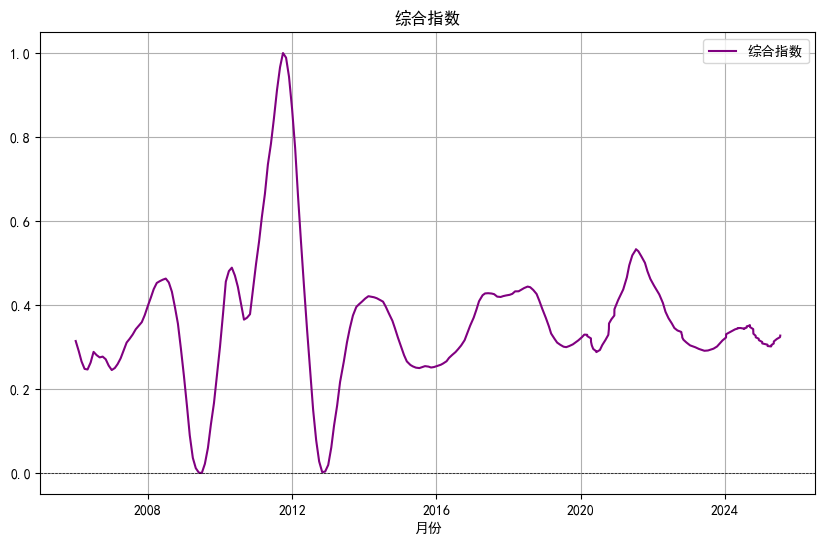

In [4]:
# 计算平均值
average_df = pd.DataFrame({
    "月份": imports["日期"],
    # "CPI": cpi["全国-同比增长"],   # 有滞后性，去掉
    "PMI": pmi["制造业-同比增长"],
    "社会用电量": electricity["全社会用电量同比"],
    "进口": imports["今值"],
    "M1M2剪刀差": money["M1M2剪刀差"]
})
# 缺省和平滑处理
average_df.fillna(method="ffill", inplace=True)
numeric_cols = average_df.select_dtypes(include=['number']).columns
average_df["平均值"] = average_df[numeric_cols].mean(axis=1)
average_df["平均值"] = average_df["平均值"].rolling(window=smooth_window, center=True).mean()
average_df["平均值"] = (average_df["平均值"] - average_df["平均值"].min()) / (average_df["平均值"].max() - average_df["平均值"].min())

# 画图
plt.figure(figsize=(10, 6))
plt.plot(average_df["月份"], average_df["平均值"], label="综合指数", color="purple")
plt.title("综合指数")
plt.xlabel("月份")
# plt.ylabel("归一化值")
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.grid(True)
plt.legend()
plt.savefig("output/macro_china_average_index.png", dpi=300, bbox_inches='tight')
plt.show()

<img src="assets/克强指数.png">